In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Boston Housing Dataset

In [6]:
boston_df = pd.read_csv("HousingData.csv")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Prepare the Dataframe

In [19]:
boston_df.rename(columns={"CRIM":"criminal",
      "ZN":"land_zones",
      "INDUS":"small_business",
      "CHAS":"river_neighboor",
      "NOX":"nitric_oxides",
      "RM":"avg_room",
      "AGE":"age",
      "DIS":"distance_center",
      "RAD":"highway_access",
      "TAX":"tax",
      "PTRATIO":"student_teacher_ratio",
      "B":"black_people",
      "LSTAT":"low_population",
      "MEDV":"price"}, inplace=True)
boston_df.head()

,criminal,land_zones,small_business,river_neighboor,nitric_oxides,avg_room,age,distance_center,highway_access,tax,student_teacher_ratio,black_people,low_population,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [20]:
# Check for null values
boston_df.isnull().sum()

criminal                 20
land_zones               20
small_business           20
river_neighboor          20
nitric_oxides             0
avg_room                  0
age                      20
distance_center           0
highway_access            0
tax                       0
student_teacher_ratio     0
black_people              0
low_population           20
Price                     0
dtype: int64

In [21]:
# Fill null values with 0
boston_df.fillna(0, inplace=True)
boston_df.isnull().sum()

criminal                 0
land_zones               0
small_business           0
river_neighboor          0
nitric_oxides            0
avg_room                 0
age                      0
distance_center          0
highway_access           0
tax                      0
student_teacher_ratio    0
black_people             0
low_population           0
Price                    0
dtype: int64

In [22]:
# EDA

boston_df.corr()

,criminal,land_zones,small_business,river_neighboor,nitric_oxides,avg_room,age,distance_center,highway_access,tax,student_teacher_ratio,black_people,low_population,Price
criminal,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120
land_zones,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
small_business,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371
river_neighboor,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
nitric_oxides,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
avg_room,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
age,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699
distance_center,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
highway_access,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
tax,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


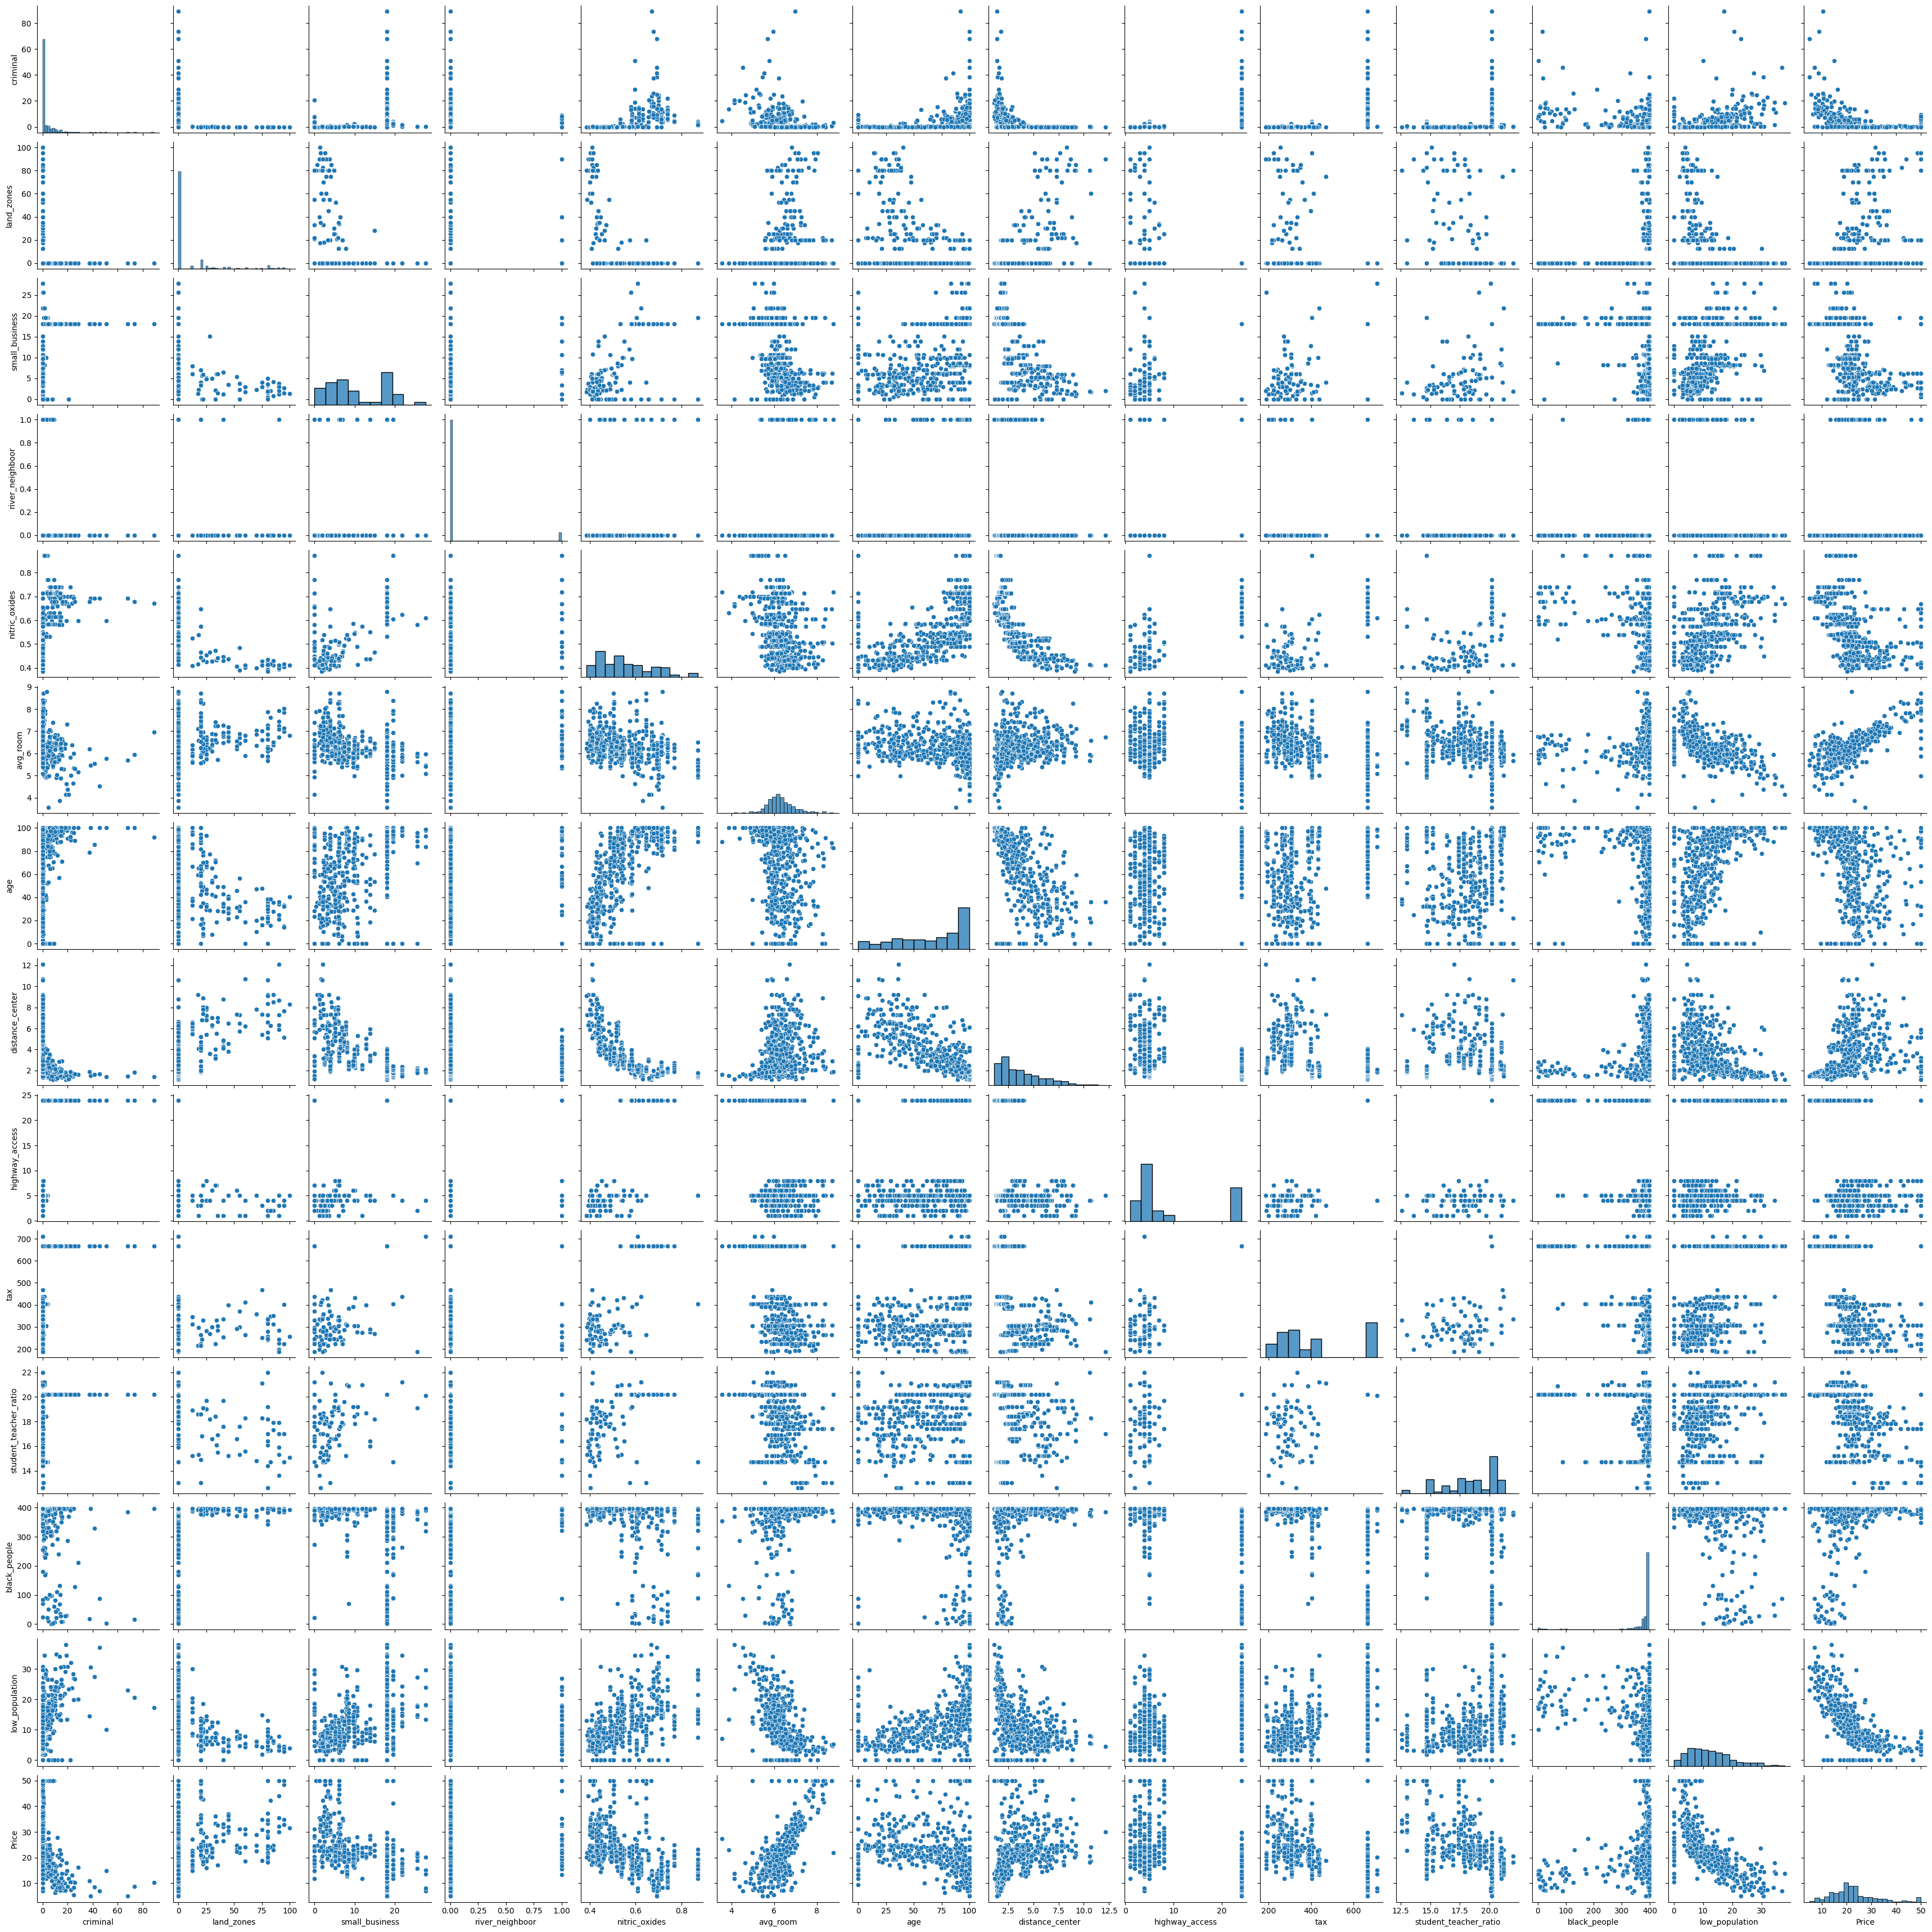

In [25]:
sns.pairplot(boston_df)

<Axes: xlabel='avg_room', ylabel='Price'>

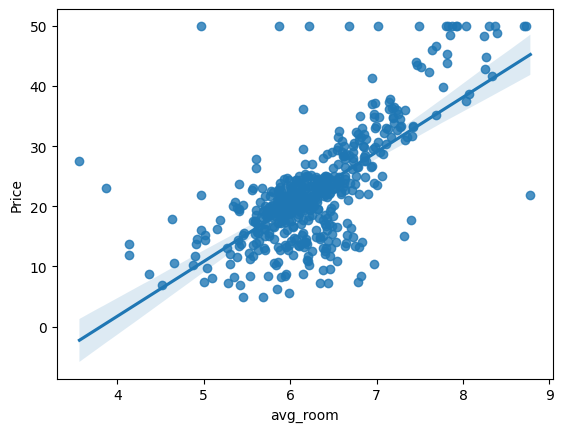

In [27]:
sns.regplot(x='avg_room', y='Price', data=boston_df)

<Axes: xlabel='low_population', ylabel='Price'>

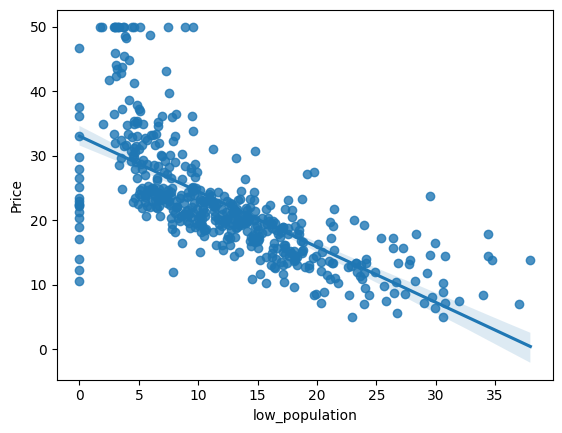

In [29]:
sns.regplot(x='low_population', y='Price', data=boston_df)

In [30]:
# Prepare data 
X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]
print(X.head())
print(y.head())

   criminal  land_zones  small_business  river_neighboor  nitric_oxides  \
0   0.00632        18.0            2.31              0.0          0.538   
1   0.02731         0.0            7.07              0.0          0.469   
2   0.02729         0.0            7.07              0.0          0.469   
3   0.03237         0.0            2.18              0.0          0.458   
4   0.06905         0.0            2.18              0.0          0.458   

   avg_room   age  distance_center  highway_access  tax  \
0     6.575  65.2           4.0900               1  296   
1     6.421  78.9           4.9671               2  242   
2     7.185  61.1           4.9671               2  242   
3     6.998  45.8           6.0622               3  222   
4     7.147  54.2           6.0622               3  222   

   student_teacher_ratio  black_people  low_population  
0                   15.3        396.90            4.98  
1                   17.8        396.90            9.14  
2                   17.

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.39736948, -0.48778231, -1.1683984 , ...,  0.18727079,
         0.39651419, -0.91899712],
       [-0.38507961, -0.48778231, -0.07074986, ..., -0.21208981,
         0.3870674 , -1.62697272],
       [-0.3802666 , -0.48778231, -0.50532336, ..., -0.16771641,
         0.42854113, -0.23955796],
       ...,
       [-0.39916228,  3.07160832, -1.19222985, ..., -0.56707702,
         0.35987906, -0.81300461],
       [ 0.94729761, -0.48778231,  1.06334677, ...,  0.8528718 ,
        -2.87841346,  1.53513711],
       [-0.37333943, -0.48778231, -0.27401811, ...,  1.16348561,
        -3.32828832, -0.18248507]], shape=(354, 13))

## Model Training

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [35]:
# print coefficients and intercept
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [-1.09695999  0.75188996  0.01229627  0.9789488  -1.73435964  3.26761551
 -0.87083099 -3.04008689  1.72405084 -1.2891791  -2.13922651  0.99724613
 -3.00559462]
Intercept:  23.01581920903955


In [36]:
# Predictions
y_pred = lr.predict(X_test)     
y_pred

array([30.61657164, 36.71676525, 14.95849931, 25.11833137, 18.17129837,
       22.67808419, 20.05769163, 14.65806438, 21.59289205, 20.46487094,
       25.39444789, 18.61513387, -5.6915843 , 21.69575952, 18.56271012,
       30.21482592, 19.46995426,  5.97585191, 40.68785029, 16.83546764,
       30.1186887 , 30.07553476, 11.45080276, 27.58489241, 17.01462431,
       14.81613954, 26.44628208, 14.36010475, 22.89118492, 19.19384013,
       21.97203474, 24.66689654, 24.52236477, 16.34931989, 16.24300471,
       17.06265582, 30.33299926, 19.86262411, 24.74401497, 28.06692884,
       14.54517067, 31.34059088, 42.71626971, 17.80983371, 26.89420659,
       16.11270597, 13.72522397, 26.18275778, 19.46720696, 29.67786448,
       20.93706842, 35.10100327, 15.83268858, 25.55322247, 39.20906719,
       21.97433804, 18.01885158, 32.52883896, 24.91303991, 13.01405097,
       22.53500069, 30.75868888, 31.41568973, 16.26809661, 20.70677755,
       17.49101726, 19.63571768, 25.91604588, 30.84832514, 11.56

Text(0.5, 1.0, 'Actual vs Predicted Prices')

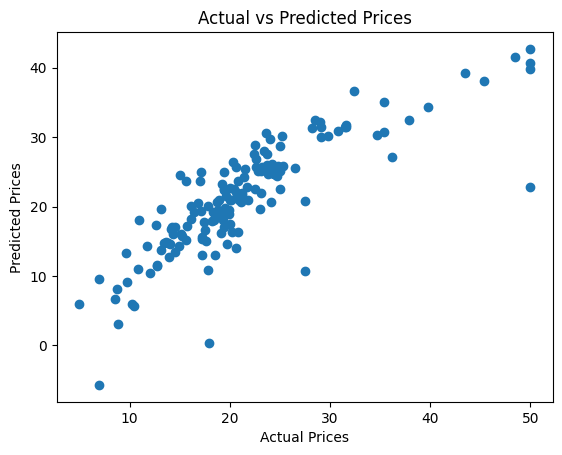

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

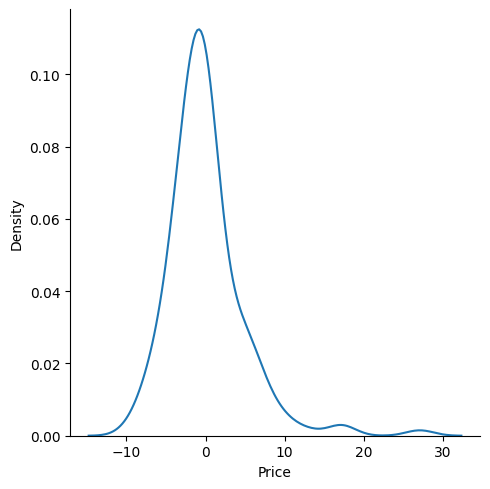

In [39]:
# Plot the Residuals
residuals = y_test - y_pred
sns.displot(residuals, kind='kde')

In [40]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1953132348573656
Mean Squared Error: 22.794533581454527
Root Mean Squared Error: 4.7743621125187525


In [44]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.6940868795245111


In [45]:
# Adjusted R2 Score
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 0.6652689768710229


## New Data Prediction

In [50]:
lr.predict(scaler.transform(X_test[0, :].reshape(1,-1)))

c:\Users\sahil\OneDrive\Desktop\Projects\AI Projects\Boston Housing Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([36.18704453])

## Pickling the Model File for Deployment

In [52]:
import pickle

pickle.dump(lr, open("regmodel.pkl", "wb"))